In [1]:
# libraries to use
import requests
import pandas as pd
import json
import io
import itertools
import datetime
import numpy as np
import math
import os
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [3]:
# get player stats from NBA.com (MeasureType=Base,Advanced,Misc,Scoring,Usage)
def get_player_stats_df(MeasureType, Season, PerMode):
    players_stats_url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType='+MeasureType+'&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode='+PerMode+'&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season='+Season+'&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='
    players_stats_response = requests.get(url=players_stats_url, headers=headers).json()
    players_stats_headers = players_stats_response['resultSets'][0]['headers']
    players_stats_data = players_stats_response['resultSets'][0]['rowSet']
    players_stats_df = pd.DataFrame(data=players_stats_data, columns=players_stats_headers)
    return players_stats_df

In [4]:
Season = '2022-23'
#PerMode = 'Totals'
PerMode = 'PerGame'
#PerMode = 'Per100Possessions'
MeasureType = 'Base'
#MeasureType = 'Advanced'
#MeasureType = 'Misc'
#MeasureType = 'Scoring'
#MeasureType = 'Usage'

In [5]:
players_stats_base_df = get_player_stats_df('Base', Season, PerMode)
players_stats_adv_df =  get_player_stats_df('Advanced', Season, PerMode)
players_stats_misc_df =  get_player_stats_df('Misc', Season, PerMode)
players_stats_scoring_df =  get_player_stats_df('Scoring', Season, PerMode)
players_stats_usage_df =  get_player_stats_df('Usage', Season, PerMode)

In [11]:
players_stats_base_df.to_csv('players_stats_base.csv')
players_stats_base_df.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,22.0,13,5,8,0.385,...,463,388,458,466,437,338,473,225,32,461
1,1631260,AJ Green,AJ,1610612749,MIL,23.0,30,24,6,0.800,...,463,463,419,484,355,318,415,225,32,394
2,1631100,AJ Griffin,AJ,1610612737,ATL,19.0,59,28,31,0.475,...,400,256,363,406,198,233,268,225,32,259
3,203932,Aaron Gordon,Aaron,1610612743,DEN,27.0,54,39,15,0.722,...,62,34,210,51,77,2,67,51,32,82
4,1628988,Aaron Holiday,Aaron,1610612737,ATL,26.0,52,28,24,0.538,...,319,265,347,313,376,254,383,225,32,386


In [12]:
players_stats_adv_df.to_csv('players_stats_adv.csv')
players_stats_adv_df.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,22.0,13,5,8,0.385,...,175,218,30,30,321,440,448,434,442,139
1,1631260,AJ Green,AJ,1610612749,MIL,23.0,30,24,6,0.800,...,261,288,143,143,276,368,364,368,362,290
2,1631100,AJ Griffin,AJ,1610612737,ATL,19.0,59,28,31,0.475,...,243,205,180,180,314,159,159,187,187,220
3,203932,Aaron Gordon,Aaron,1610612743,DEN,27.0,54,39,15,0.722,...,134,286,316,316,92,70,102,71,100,58
4,1628988,Aaron Holiday,Aaron,1610612737,ATL,26.0,52,28,24,0.538,...,413,126,102,102,446,315,306,378,361,369


In [13]:
players_stats_misc_df.to_csv('players_stats_misc.csv')
players_stats_misc_df.head()


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PTS_PAINT_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,NBA_FANTASY_PTS_RANK
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,22.0,13,5,8,0.385,...,437,44,18,62,460,463,125,59,466,473
1,1631260,AJ Green,AJ,1610612749,MIL,23.0,30,24,6,0.800,...,485,97,121,104,397,463,54,98,484,415
2,1631100,AJ Griffin,AJ,1610612737,ATL,19.0,59,28,31,0.475,...,237,254,282,303,240,400,261,154,406,268
3,203932,Aaron Gordon,Aaron,1610612743,DEN,27.0,54,39,15,0.722,...,26,399,351,406,86,62,483,305,51,67
4,1628988,Aaron Holiday,Aaron,1610612737,ATL,26.0,52,28,24,0.538,...,388,167,199,177,328,319,250,168,313,383


In [14]:
players_stats_scoring_df.to_csv('players_stats_scoring.csv')
players_stats_scoring_df.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PCT_PTS_PAINT_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,22.0,13,5,8,0.385,...,338,153,333,1,300,77,431,440,448,139
1,1631260,AJ Green,AJ,1610612749,MIL,23.0,30,24,6,0.800,...,492,66,430,287,170,62,446,368,364,290
2,1631100,AJ Griffin,AJ,1610612737,ATL,19.0,59,28,31,0.475,...,323,240,258,284,173,221,286,159,159,220
3,203932,Aaron Gordon,Aaron,1610612743,DEN,27.0,54,39,15,0.722,...,120,195,303,378,79,288,221,70,102,58
4,1628988,Aaron Holiday,Aaron,1610612737,ATL,26.0,52,28,24,0.538,...,307,470,28,336,121,420,88,315,306,369


In [15]:
# example NBA.com 2021-21 (Season=2021-22) players bio (https://stats.nba.com/stats/leaguedashplayerbiostats):
# use for AGE, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT
plyrs_bio_url = 'https://stats.nba.com/stats/leaguedashplayerbiostats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&Season='+Season+'&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='
plyrs_bio_response = requests.get(url=plyrs_bio_url, headers=headers).json()
plyrs_bio_headers = plyrs_bio_response['resultSets'][0]['headers']
plyrs_bio_data = plyrs_bio_response['resultSets'][0]['rowSet']
plyrs_bio_df = pd.DataFrame(data=plyrs_bio_data, columns=plyrs_bio_headers)


In [16]:
plyrs_bio_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
0,1630639,A.J. Lawson,1610612742,DAL,22.0,6-6,78,179,South Carolina,Canada,...,13,2.6,0.8,0.1,-10.9,0.028,0.151,0.182,0.622,0.029
1,1631260,AJ Green,1610612749,MIL,23.0,6-5,77,190,Northern Iowa,USA,...,30,4.6,1.2,0.6,-5.9,0.016,0.094,0.163,0.633,0.099
2,1631100,AJ Griffin,1610612737,ATL,19.0,6-6,78,220,Duke,USA,...,59,8.9,2.0,1.0,-0.6,0.022,0.077,0.172,0.579,0.070
3,203932,Aaron Gordon,1610612743,DEN,27.0,6-8,80,235,Arizona,USA,...,55,16.9,6.8,2.9,13.7,0.090,0.145,0.208,0.638,0.127
4,1628988,Aaron Holiday,1610612737,ATL,26.0,6-0,72,185,UCLA,USA,...,52,4.1,1.3,1.3,-0.5,0.027,0.062,0.128,0.529,0.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,1628380,Zach Collins,1610612759,SAS,25.0,6-11,83,250,Gonzaga,USA,...,54,10.3,6.1,2.7,-9.6,0.079,0.190,0.200,0.590,0.180
512,203897,Zach LaVine,1610612741,CHI,28.0,6-5,77,200,UCLA,USA,...,62,24.7,4.7,4.0,-0.1,0.016,0.113,0.277,0.607,0.173
513,1630192,Zeke Nnaji,1610612743,DEN,22.0,6-9,81,240,Arizona,USA,...,44,5.1,2.3,0.3,-6.8,0.092,0.078,0.142,0.634,0.030
514,1630533,Ziaire Williams,1610612763,MEM,21.0,6-9,81,185,Stanford,USA,...,34,5.1,2.1,0.7,-5.4,0.027,0.106,0.168,0.496,0.067


In [17]:
plyrs_bio_df.to_csv("players_bio.csv")

In [156]:
# with PerMode = 'PerGame', MIN is MPG
player_ids_2022_23 = players_stats_base_df[['PLAYER_ID', 'PLAYER_NAME','GP','MIN']]


In [157]:
player_ids_2022_23

,PLAYER_ID,PLAYER_NAME,GP,MIN
0,1630639,A.J. Lawson,13,4.8
1,1631260,AJ Green,29,9.8
2,1631100,AJ Griffin,59,19.9
3,203932,Aaron Gordon,52,30.0
4,1628988,Aaron Holiday,52,14.0
...,...,...,...,...
508,1628380,Zach Collins,52,21.7
509,203897,Zach LaVine,60,35.9
510,1630192,Zeke Nnaji,44,13.3
511,1630533,Ziaire Williams,31,16.0


In [158]:
high_mpg_players_2022_23_df = player_ids_2022_23.loc[(player_ids_2022_23['MIN'] >= 24)]
high_mpg_players_2022_23_df

,PLAYER_ID,PLAYER_NAME,GP,MIN
3,203932,Aaron Gordon,52,30.0
5,1630174,Aaron Nesmith,57,24.4
8,201143,Al Horford,50,30.8
11,1627936,Alex Caruso,54,24.1
15,1630578,Alperen Sengun,57,28.2
...,...,...,...,...
489,1630178,Tyrese Maxey,43,32.7
495,203506,Victor Oladipo,31,27.3
500,1628976,Wendell Carter Jr.,44,29.6
509,203897,Zach LaVine,60,35.9


In [159]:
base_subset = ['PLAYER_ID',
 'PLAYER_NAME',
 'GP',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS']

advanced_subset = ['OFF_RATING',
 'DEF_RATING',
 'NET_RATING',
 'AST_TO',
 'AST_RATIO',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'TM_TOV_PCT',
 'EFG_PCT',
 'TS_PCT',
 'USG_PCT',
 'PACE',
 'PIE',
 'POSS']

misc_subset = ['PTS_OFF_TOV',
 'PTS_2ND_CHANCE',
 'PTS_FB',
 'PTS_PAINT']

scoring_subset = ['PCT_PTS_2PT_MR',
 'PCT_PTS_FB']

In [160]:
players_stats_base_subset_df = players_stats_base_df[base_subset]
players_stats_adv_subset_df = players_stats_adv_df[advanced_subset]
players_stats_misc_subset_df = players_stats_misc_df[misc_subset]
players_stats_scoring_subset_df = players_stats_scoring_df[scoring_subset]
playbed_stats_combined_df = pd.concat([players_stats_base_subset_df, 
                               players_stats_adv_subset_df, 
                               players_stats_misc_subset_df, 
                               players_stats_scoring_subset_df], axis=1)

In [161]:
playbed_stats_combined_df.head()

,PLAYER_ID,PLAYER_NAME,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,USG_PCT,PACE,PIE,POSS,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,PCT_PTS_2PT_MR,PCT_PTS_FB
0,1630639,A.J. Lawson,13,4.8,1.0,2.0,0.500,0.5,1.2,0.438,...,0.182,106.08,0.076,139,0.0,0.5,0.2,0.9,0.000,0.059
1,1631260,AJ Green,29,9.8,1.7,3.7,0.453,1.3,3.1,0.438,...,0.163,103.03,0.084,613,0.4,0.9,0.4,0.3,0.058,0.086
2,1631100,AJ Griffin,59,19.9,3.5,7.5,0.472,1.4,3.7,0.384,...,0.172,102.54,0.077,2507,1.1,0.9,0.9,3.3,0.110,0.099
3,203932,Aaron Gordon,52,30.0,6.5,11.1,0.583,1.0,2.6,0.376,...,0.208,100.82,0.118,3276,2.1,2.7,2.5,10.6,0.025,0.148
4,1628988,Aaron Holiday,52,14.0,1.5,3.6,0.418,0.6,1.4,0.413,...,0.128,103.75,0.050,1575,0.6,0.6,0.3,1.5,0.075,0.080


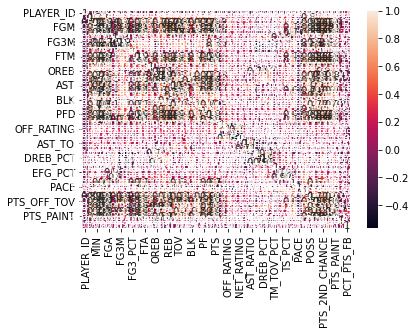

In [162]:
corr_matrix = playbed_stats_combined_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [163]:
simple_subset=['PLAYER_ID',
 'PLAYER_NAME',
 'GP',
 'MIN',
 'FGM',
 'FGA',
 'FG3M',
 'FG3A',
 'FTM',
 'FTA',
 'OREB',
 'DREB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PTS',
 'PLUS_MINUS'
]

simple_df = playbed_stats_combined_df[simple_subset]


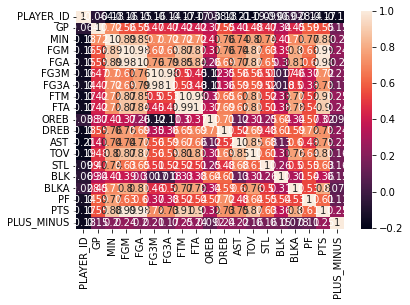

In [164]:
corr_matrix = simple_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [172]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [165]:
# scale data
X = simple_df.drop(['PLAYER_ID','PLAYER_NAME','GP','MIN'], axis=1)

In [166]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.91523067, -0.97223102, -0.52883866, ..., -1.33324594,
        -0.90500376, -0.32286519],
       [-0.63533003, -0.6418528 ,  0.37622967, ..., -0.84313117,
        -0.59279614, -0.28701457],
       [ 0.08441448,  0.0966397 ,  0.48936321, ..., -0.59807378,
        -0.01095465,  0.03564096],
       ...,
       [-0.51537261, -0.68072082, -0.75510574, ...,  0.13709838,
        -0.55022237, -0.64552072],
       [-0.435401  , -0.33090859, -0.41570512, ...,  0.01456969,
        -0.5076486 , -0.60967011],
       [ 2.60352027,  1.78739885, -0.86823929, ...,  0.62721316,
         2.41575007,  1.89987294]])

In [167]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00195312,  0.98059824,  0.67596669,  0.69150974,  0.87641935,
         0.87421544,  0.37352655,  0.76193568,  0.74351588,  0.86802623,
         0.63447568,  0.39240398,  0.80337986,  0.63621713,  0.99418138,
         0.23900608],
       [ 0.98059824,  1.00195312,  0.76371158,  0.79241689,  0.85274073,
         0.84026723,  0.25911315,  0.68885787,  0.76795384,  0.86696141,
         0.65148956,  0.29892405,  0.80919968,  0.60052273,  0.98464916,
         0.19549145],
       [ 0.67596669,  0.76371158,  1.00195312,  0.98655791,  0.50289762,
         0.45251979, -0.11562754,  0.34808414,  0.56460438,  0.56057698,
         0.51103737,  0.01713345,  0.46016435,  0.37067979,  0.71884981,
         0.20767493],
       [ 0.69150974,  0.79241689,  0.98655791,  1.00195312,  0.52749159,
         0.48064097, -0.11161482,  0.36125399,  0.58663384,  0.5905104 ,
         0.52237748,  0.01850291,  0.49894188,  0.38422602,  0.73356734,
         0.16636146],
       [ 0.87641935,  0.85274073,  0

In [168]:
pca=PCA()

In [169]:
X_pca = pca.fit_transform(X_scaled)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-3.541721,-0.764828,0.135216,0.613411,-0.496646,-0.090361,0.157654,-0.039082,0.158915,-0.071488,-0.061236,-0.124683,0.121139,0.034719,-0.022225,0.002347
1,-2.670936,-1.384626,-0.180868,-0.358040,-0.659539,-0.324564,-0.149158,-0.266701,-0.349215,0.114816,-0.140320,-0.084094,0.137501,0.029903,-0.012548,0.001743
2,-0.890190,-1.301295,-0.226931,-0.516948,-0.247558,0.083060,0.639961,-0.134703,0.129993,-0.224724,-0.443794,0.067184,0.042448,-0.023716,-0.034057,0.001086
3,3.567357,1.798734,-2.544741,1.497865,-0.026475,-0.155717,1.068529,0.093640,0.959148,0.514594,-0.158214,0.013066,0.016691,0.341244,-0.108948,-0.013155
4,-2.133239,-0.399457,-0.038355,0.136819,0.331958,0.168368,0.061798,0.345453,0.266896,0.050324,-0.051310,-0.028708,0.105256,-0.044999,0.055123,0.002081


In [170]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
FGM,0.314361,-0.018676,0.013835,0.056500,-0.106766,-0.000328,0.051573,-0.118088,-0.012975,-0.131148,-0.568004,-0.027754,0.205037,0.106694,-0.394265,-0.565514
FGA,0.311850,-0.115532,0.051051,0.004228,-0.114657,0.003478,0.056056,-0.075781,0.048248,-0.085332,-0.407826,-0.028759,-0.486041,-0.075686,0.667823,-0.004960
FG3M,0.221871,-0.380916,-0.133050,-0.350776,-0.298676,-0.040418,0.032871,-0.065327,0.001982,0.182714,0.203518,0.014004,0.581147,0.114218,0.364907,-0.099006
FG3A,0.228634,-0.379470,-0.076160,-0.333113,-0.289498,-0.037015,0.023878,-0.051385,0.024109,0.155787,0.243917,0.010643,-0.546885,-0.063020,-0.459414,-0.000007
FTM,0.288104,0.002387,0.037243,0.387752,-0.073952,0.162169,0.046253,0.094584,-0.383089,0.125146,0.242530,-0.074374,0.081867,-0.676081,0.024107,-0.176800
FTA,0.287844,0.055084,0.056122,0.390578,-0.065332,0.125993,0.052984,0.077175,-0.364743,0.119898,0.244915,-0.037469,-0.128739,0.709049,0.037054,-0.002764
OREB,0.130514,0.543730,-0.002196,-0.113991,-0.018809,-0.347437,0.391274,-0.286754,0.048027,0.557892,-0.011464,0.047140,-0.022265,-0.038006,0.009534,-0.000706
DREB,0.255817,0.301317,-0.071325,-0.102808,-0.083281,-0.301697,-0.063453,-0.351239,-0.065088,-0.681613,0.350198,-0.101815,0.006845,-0.020508,0.021257,0.000309
AST,0.257384,-0.156068,0.027173,0.052193,0.527437,-0.090310,-0.420444,-0.265199,0.186453,0.253453,0.050635,-0.519925,0.015917,0.013318,-0.012830,0.000450
TOV,0.294121,-0.024109,0.125561,0.101771,0.201450,-0.161497,-0.384169,-0.020241,0.126485,0.062795,0.058348,0.804806,0.021337,-0.024431,-0.004448,-0.000554


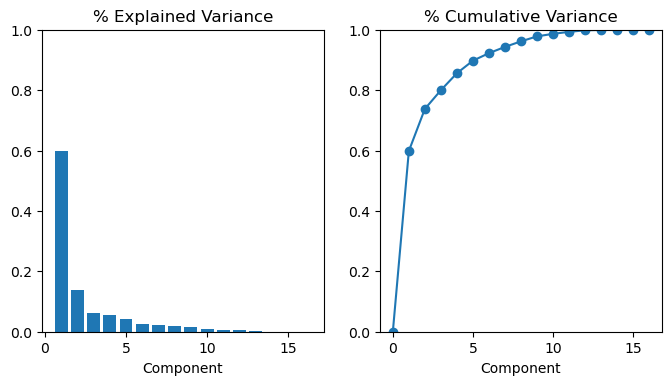

In [173]:
plot_variance(pca);

In [129]:
pca.fit(X_scaled)

PCA()

In [130]:
pca.explained_variance_ratio_

array([5.97647547e-01, 1.39506663e-01, 6.15893696e-02, 5.63554190e-02,
       4.12780784e-02, 2.58492769e-02, 2.07683210e-02, 1.83670347e-02,
       1.58766730e-02, 8.65965457e-03, 6.78655730e-03, 5.27908356e-03,
       1.18014202e-03, 6.06586100e-04, 2.45196572e-04, 4.39675889e-06])

In [132]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00196078,  0.98026927,  0.66882899,  0.68775967,  0.87596864,
         0.87329535,  0.37466323,  0.76071729,  0.74241072,  0.86735952,
         0.63132324,  0.38477954,  0.80996135,  0.63241577,  0.99388313,
         0.242711  ],
       [ 0.98026927,  1.00196078,  0.75874836,  0.79071512,  0.85367273,
         0.84121434,  0.25794693,  0.68768728,  0.76754824,  0.86715745,
         0.65091424,  0.2929631 ,  0.81644513,  0.59657225,  0.98473535,
         0.19357405],
       [ 0.66882899,  0.75874836,  1.00196078,  0.98539204,  0.49864829,
         0.44753006, -0.12356394,  0.34212166,  0.56254838,  0.55797501,
         0.50739557,  0.01047646,  0.46473612,  0.3588344 ,  0.71317008,
         0.19949545],
       [ 0.68775967,  0.79071512,  0.98539204,  1.00196078,  0.52665225,
         0.48031121, -0.11676823,  0.35891725,  0.58532963,  0.59040162,
         0.52233882,  0.01494706,  0.50885404,  0.37607719,  0.7311328 ,
         0.15434204],
       [ 0.87596864,  0.85367273,  0

In [133]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([9.58111048e+00, 2.23648329e+00, 9.87362129e-01, 9.03454717e-01,
       6.61744253e-01, 4.14399388e-01, 3.32944692e-01, 2.94448777e-01,
       2.54524860e-01, 1.38826149e-01, 1.08797828e-01, 8.46309552e-02,
       1.89192963e-02, 7.04860797e-05, 3.93083759e-03, 9.72440775e-03])

In [134]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.5976475469401678, 0.13950666341738177, 0.061589369600648626, 0.05635541902059155, 0.04127807841430511, 0.025849276907927373, 0.020768321049040316, 0.018367034741769598, 0.01587667304160092, 0.008659654567268927, 0.0067865572964309305, 0.00527908355700735, 0.0011801420152364186, 4.39675888677965e-06, 0.0002451965717163341, 0.0006065861000202191]


In [135]:
pca = PCA(n_components = 5)

In [136]:
pca.fit(X_scaled)

PCA(n_components=5)

In [137]:
pca.transform(X_scaled)

array([[-3.56380141, -0.77402057,  0.08614854,  0.63489394, -0.51154955],
       [-2.81369364, -1.38697941, -0.1310002 , -0.2917597 , -0.65878843],
       [-0.83624315, -1.2704949 , -0.22683542, -0.54526009, -0.23912508],
       ...,
       [-2.05545141,  0.95211155,  0.50310742,  0.02119212, -0.31554638],
       [-1.61184612, -0.3986589 ,  0.39322898, -0.33850442, -0.16362776],
       [ 6.89744642,  1.83953868, -0.30466372,  3.94109576,  0.86553613]])

In [138]:
scores_pca = pca.transform(X_scaled)

In [139]:
wcss = []
for i in range (1,19):
    kmeans_pca=KMeans(n_clusters = i, init="k-means++", random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Reed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


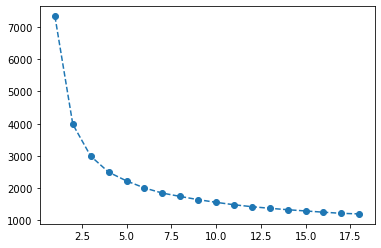

In [140]:
plt.plot(range(1,19), wcss, marker = 'o', linestyle = '--')
plt.show()

In [141]:
kmeans_pca=KMeans(n_clusters = 3, init="k-means++", random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [84]:
# scale data
X = playbed_stats_combined_df.drop(['PLAYER_ID','PLAYER_NAME','GP','MIN'], axis=1)



In [85]:
X

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,...,USG_PCT,PACE,PIE,POSS,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,PCT_PTS_2PT_MR,PCT_PTS_FB
0,1.0,2.0,0.500,0.5,1.2,0.438,0.1,0.2,0.333,0.2,...,0.182,106.08,0.076,139,0.0,0.5,0.2,0.9,0.000,0.059
1,1.6,3.5,0.444,1.3,2.9,0.427,0.1,0.1,1.000,0.2,...,0.163,102.79,0.081,575,0.3,0.8,0.4,0.4,0.063,0.094
2,3.6,7.6,0.473,1.4,3.7,0.386,0.5,0.6,0.875,0.4,...,0.171,102.55,0.077,2503,1.1,0.9,0.9,3.3,0.110,0.099
3,6.5,11.1,0.585,1.0,2.6,0.382,3.0,4.8,0.622,2.4,...,0.209,100.89,0.119,3219,2.1,2.7,2.5,10.6,0.025,0.150
4,1.5,3.7,0.415,0.6,1.5,0.413,0.5,0.5,0.857,0.4,...,0.128,103.77,0.050,1571,0.6,0.6,0.3,1.6,0.066,0.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,3.9,7.6,0.517,0.6,1.8,0.344,1.6,2.2,0.745,1.8,...,0.199,103.46,0.103,2361,0.8,1.5,0.6,5.9,0.070,0.056
507,8.4,17.7,0.472,2.7,7.3,0.372,4.6,5.4,0.842,0.5,...,0.274,100.48,0.121,4359,3.7,1.5,3.6,8.4,0.122,0.151
508,2.0,3.5,0.572,0.3,1.0,0.289,0.8,1.2,0.667,1.3,...,0.142,98.90,0.072,1199,0.9,1.8,0.5,3.3,0.009,0.094
509,2.2,5.3,0.419,0.7,2.7,0.244,0.4,0.6,0.765,0.4,...,0.165,102.74,0.045,1045,1.0,0.4,1.3,2.8,0.060,0.234


In [86]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.92425617, -0.97889569,  0.30480602, ..., -0.91114879,
        -0.72718381, -0.61790971],
       [-0.68353502, -0.68722473, -0.14825491, ..., -1.05979735,
        -0.01640447, -0.28327488],
       [ 0.11886883,  0.11000923,  0.08636593, ..., -0.19763568,
         0.51385949, -0.23546991],
       ...,
       [-0.52305425, -0.68722473,  0.88731292, ..., -0.19763568,
        -0.62564391, -0.28327488],
       [-0.44281387, -0.33721958, -0.35051425, ..., -0.34628425,
        -0.0502511 ,  1.05526443],
       [ 2.60632076,  1.78225607,  1.17856637, ...,  4.49965893,
        -0.69333718, -0.12073797]])

In [97]:
pca = PCA()

NameError: name 'PCA' is not defined

In [87]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.00196078,  0.98026927,  0.21421799, ...,  0.89652348,
         0.19872547, -0.02986799],
       [ 0.98026927,  1.00196078,  0.081311  , ...,  0.81409127,
         0.22477826, -0.01750368],
       [ 0.21421799,  0.081311  ,  1.00196078, ...,  0.36203249,
        -0.03176439,  0.039473  ],
       ...,
       [ 0.89652348,  0.81409127,  0.36203249, ...,  1.00196078,
         0.05358366, -0.04597474],
       [ 0.19872547,  0.22477826, -0.03176439, ...,  0.05358366,
         1.00196078,  0.01425698],
       [-0.02986799, -0.01750368,  0.039473  , ..., -0.04597474,
         0.01425698,  1.00196078]])

In [88]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([1.62676350e+01, 5.86795373e+00, 3.21200042e+00, 2.26059021e+00,
       1.83701404e+00, 1.58356574e+00, 1.28085249e+00, 1.18530285e+00,
       1.08577590e+00, 9.46668553e-01, 8.72860498e-01, 6.97867929e-01,
       6.12336747e-01, 5.90302070e-01, 4.84676380e-01, 4.79152128e-01,
       3.87108043e-01, 3.70097891e-01, 3.25185815e-01, 2.78636392e-01,
       2.47592264e-01, 2.20890030e-01, 1.75165448e-01, 1.59702417e-01,
       1.34993270e-01, 1.09031078e-01, 1.00847390e-01, 7.65472031e-02,
       6.54145034e-02, 4.61583024e-02, 3.03534074e-02, 2.59261710e-02,
       1.82102134e-02, 1.45575802e-02, 1.15407118e-02, 9.43834321e-03,
       5.04856523e-03, 2.86100690e-03, 2.19496334e-03, 2.23691330e-04,
       6.73281925e-05, 6.21621021e-06])

In [89]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.38656666937386064, 0.1394397726495448, 0.07632654069860983, 0.05371824655043667, 0.04365283570540849, 0.03763016146830833, 0.030436807782522043, 0.028166268488811427, 0.025801216450370437, 0.022495618403597015, 0.020741722775894735, 0.016583386626227645, 0.014550915150896366, 0.014027306677010222, 0.011517330813483441, 0.01138605840171186, 0.009198821253736146, 0.008794610207009251, 0.007727367714543171, 0.00662121704264328, 0.0058835175995676425, 0.005248994289414317, 0.004162444240186779, 0.003794997330908722, 0.0032078356103161614, 0.0025908978561915296, 0.0023964294420403425, 0.0018189858164901727, 0.0015544402540148404, 0.0010968565018943748, 0.0007212858897584483, 0.0006160817829664984, 0.0004327280235142893, 0.0003459307578337236, 0.0002742411238345298, 0.0002242826872880862, 0.00011996870133006145, 6.79859061301673e-05, 5.2158759826012104e-05, 5.31556138702617e-06, 1.5999151133610635e-06, 1.4771536707652228e-07]


In [18]:
def get_four_factors_df(MeasureType, Season, PerMode):
    four_factors_url = 'https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=' + MeasureType + '&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=' + PerMode + '&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2022-23&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision='
    four_factors_response = requests.get(url=four_factors_url, headers=headers).json()
    four_factors_headers = four_factors_response['resultSets'][0]['headers']
    four_factors_data = four_factors_response['resultSets'][0]['rowSet']
    four_factors_df = pd.DataFrame(data=four_factors_data, columns=four_factors_headers)
    return four_factors_df

In [21]:
FFPerMode = 'PerGame'
FFMeasureType = 'Four%20Factors'
four_factors_2021_22_df = get_four_factors_df(FFMeasureType, FFPerMode, '2021-22')
four_factors_2022_23_df = get_four_factors_df(FFMeasureType, FFPerMode, '2022-23')

In [22]:
four_factors_2021_22_df.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'EFG_PCT',
       'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE',
       'OPP_TOV_PCT', 'OPP_OREB_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'EFG_PCT_RANK', 'FTA_RATE_RANK',
       'TM_TOV_PCT_RANK', 'OREB_PCT_RANK', 'OPP_EFG_PCT_RANK',
       'OPP_FTA_RATE_RANK', 'OPP_TOV_PCT_RANK', 'OPP_OREB_PCT_RANK'],
      dtype='object')

In [24]:
DIFF_EFG_PCT = four_factors_2021_22_df['EFG_PCT'] - four_factors_2021_22_df['OPP_EFG_PCT']
DIFF_TOV_PCT = four_factors_2021_22_df['TM_TOV_PCT'] - four_factors_2021_22_df['OPP_TOV_PCT']
DIFF_REB_PCT = four_factors_2021_22_df['OREB_PCT'] - four_factors_2021_22_df['OPP_OREB_PCT']
DIFF_FTA_RATE = four_factors_2021_22_df['FTA_RATE'] - four_factors_2021_22_df['OPP_FTA_RATE']
four_factors_2021_22_df.loc[:,'DIFF_EFG_PCT']  = DIFF_EFG_PCT
four_factors_2021_22_df.loc[:,'DIFF_TOV_PCT']  = DIFF_TOV_PCT
four_factors_2021_22_df.loc[:,'DIFF_REB_PCT']  = DIFF_REB_PCT
four_factors_2021_22_df.loc[:,'DIFF_FTA_RATE']  = DIFF_FTA_RATE
four_factors_2021_22_df.to_csv('four_factors_2021_22.csv')

In [29]:
DIFF_EFG_PCT = four_factors_2022_23_df['EFG_PCT'] - four_factors_2022_23_df['OPP_EFG_PCT']
DIFF_TOV_PCT = four_factors_2022_23_df['TM_TOV_PCT'] - four_factors_2022_23_df['OPP_TOV_PCT']
DIFF_REB_PCT = four_factors_2022_23_df['OREB_PCT'] - four_factors_2022_23_df['OPP_OREB_PCT']
DIFF_FTA_RATE = four_factors_2022_23_df['FTA_RATE'] - four_factors_2022_23_df['OPP_FTA_RATE']
four_factors_2022_23_df.loc[:,'DIFF_EFG_PCT']  = DIFF_EFG_PCT
four_factors_2022_23_df.loc[:,'DIFF_TOV_PCT']  = DIFF_TOV_PCT
four_factors_2022_23_df.loc[:,'DIFF_REB_PCT']  = DIFF_REB_PCT
four_factors_2022_23_df.loc[:,'DIFF_FTA_RATE']  = DIFF_FTA_RATE
four_factors_2022_23_df.to_csv('four_factors_2022_23.csv')